# MAM02 SVMs and Random Forest
Students: Dilara Tank, Martijn Siepel

In [1]:
# imports

import pandas as pd
from sklearn import svm
import numpy as np
from sklearn import metrics

In [2]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

## Data exploration

There are 700 rows and 251 columns in the train set.

In [3]:
raw_train

,cc,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_241,p_242,p_243,p_244,p_245,p_246,p_247,p_248,p_249,p_250
0,0,5.990080,2.372956,1.863723,1.912556,2.447490,3.805296,0.079518,2.735940,2.242411,...,4.178314,2.842667,1.558608,4.244815,3.994065,3.617629,3.232601,1.196992,3.599879,1.273826
1,0,3.876533,3.761698,2.072886,2.690199,0.682463,2.717090,0.413700,4.269970,2.273345,...,3.310263,1.444818,4.577748,4.148891,3.870811,4.334630,3.485450,2.558260,2.864337,2.070249
2,0,3.417281,3.458750,3.394488,4.422391,2.548079,2.944549,3.387399,4.615141,3.167030,...,3.804504,3.866382,2.940198,4.159919,3.694627,2.976894,3.460826,4.145632,1.790922,2.547390
3,0,4.651434,2.695008,1.493320,4.594457,1.903162,0.913204,3.281215,3.124500,4.862742,...,1.843456,2.350108,4.497963,3.332925,2.157612,3.951805,3.224491,1.376894,2.733858,1.433679
4,0,2.186504,3.473139,1.830540,3.105082,2.572080,4.591407,1.209103,3.311880,2.824717,...,2.022999,2.570952,4.405190,4.225326,2.686949,2.259473,3.928619,4.852162,4.456258,3.135190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,2.694740,5.172024,2.365657,3.675559,2.985784,4.584865,2.361670,1.994775,2.136689,...,3.812098,3.046719,2.939828,2.328593,3.759822,1.683018,2.975785,4.235410,0.797459,3.380627
696,1,2.151744,4.682264,2.566471,4.302707,2.854239,2.787095,1.726916,1.829500,3.047581,...,2.404283,4.183376,3.166567,2.621022,3.856908,1.958613,2.610078,3.453517,2.782237,3.704500
697,1,3.581671,4.068131,3.499364,2.779425,4.065883,2.288258,3.796080,5.012222,4.168613,...,4.863811,2.409710,3.463669,3.144249,3.041745,4.361741,3.025681,1.116597,4.042750,2.844593
698,1,4.663016,4.004986,3.046081,2.626760,3.375057,3.829221,3.370321,4.138768,4.971202,...,3.592864,3.151530,1.812748,1.735959,3.579429,1.813875,4.127705,3.095179,1.009377,5.152303


There are 300 rows and 251 columns in the test set.

In [4]:
raw_test

,cc,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,...,p_241,p_242,p_243,p_244,p_245,p_246,p_247,p_248,p_249,p_250
0,0,1.612468,3.474305,3.081643,2.647540,1.477145,2.226074,0.907987,1.930012,2.031522,...,3.012094,5.157420,3.271333,3.451251,3.058974,1.503359,1.734572,2.834744,3.686796,2.067522
1,0,1.300964,3.075240,2.436726,4.035113,1.827510,3.886138,1.795661,1.664807,2.822648,...,4.514789,3.051476,3.925865,3.011847,3.392423,3.479198,2.213151,4.181237,3.711856,2.431092
2,0,0.730748,3.798289,2.741223,3.831064,1.779807,1.371133,1.286970,4.026218,2.966135,...,3.890185,3.589208,3.702127,4.566962,4.200340,4.353270,3.298243,4.260439,2.615887,3.268334
3,0,1.760209,2.877058,4.115963,3.297249,2.233364,2.165131,2.784745,3.226482,2.693925,...,3.943689,2.775926,4.189492,4.020823,2.355680,2.643243,3.660590,4.114268,2.521084,1.291745
4,0,2.335384,1.078580,2.289023,2.876278,2.435920,4.839064,4.033762,2.575286,2.611814,...,2.427503,3.331249,4.052921,1.686589,1.937887,2.529955,1.483750,2.489929,2.104198,3.536856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,3.018572,1.933102,3.382359,2.397873,3.112016,2.308696,2.674707,0.888944,2.409014,...,2.732044,3.351871,2.515280,3.299979,3.849993,4.483393,3.237941,2.427215,2.807415,2.906133
296,1,3.308753,5.260347,2.917089,4.919993,1.979389,3.099847,2.010594,3.591778,0.327217,...,1.809449,2.298975,3.361137,2.190559,3.992505,3.045573,4.251126,3.943378,1.998725,2.070585
297,1,2.930498,2.553745,3.279947,1.146571,2.969376,2.493065,4.488515,3.366241,1.200322,...,3.229196,4.270557,0.570573,1.942790,2.940316,4.197061,3.716778,2.315817,3.263704,0.918061
298,1,1.269487,2.615980,1.549721,5.626274,2.785671,3.360088,2.980640,3.692053,3.110285,...,3.960706,4.160297,4.622836,2.379770,2.621007,2.680317,2.795090,3.815277,1.583589,4.019925


The classes are equally distributed among the train and test set.

In [5]:
# sum all rows where cc = 0 in the training set
print('cc = 0, train:', (raw_train['cc'] == 0).sum())
# sum all rows where cc = 1 in the training set
print('cc = 1, train:', (raw_train['cc'] == 1).sum())

# sum all rows where cc = 0 in the test set
print('cc = 0, test :', (raw_test['cc'] == 0).sum())
# sum all rows where cc = 1 in the test set
print('cc = 1, test :', (raw_test['cc'] == 1).sum())

cc = 0, train: 350
cc = 1, train: 350
cc = 0, test : 150
cc = 1, test : 150


## SVM

We fit sklearn's SVM to the data and allow probabilities. We show the amount of support vectors the model created.

In [6]:
clf = svm.SVC(kernel = 'linear', probability=True)
clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
len(clf.support_vectors_) # 216 in R

213

We make predictions with probabilities and compute the AUC of the model. The ROC curve plots the sensitivity (true positive rate) against the specificity (true negative rate) of the data. The area under this curve (Area Under Curve -> AUC) says something about the ability of the classifier to distinguish between the positive (cc=1) and negative (cc=0) class. An AUC of 1 would indicate that the model correctly distinguishes between all positive and negative classes. An AUC between 0.5 and 1 means there is a high chance that the model will be able to distinguish between the classes. An AUC of 0.89 is therefore quite good.

In [7]:
preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1] # with probabilities
# preds = clf.predict(raw_test[raw_test.columns[1:]]) # without probability

y = raw_test[raw_test.columns[0]]
fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=1)
metrics.auc(fpr, tpr) # 0.893 in R

0.8962222222222223

### Vary cost

In [8]:
for cost in [0.1, 1, 10]:
    # fit the svm model
    clf = svm.SVC(kernel = 'linear', probability = True, C=cost)
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("Cost: %-10.1f  AUC: %4f" % (cost, auc))

Cost: 0.1         AUC: 0.892400
Cost: 1.0         AUC: 0.896311
Cost: 10.0        AUC: 0.896222


### Vary kernel

In [9]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # fit the svm model
    clf = svm.SVC(kernel = kernel, probability = True, gamma='auto')
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: linear      AUC: 0.896267
Kernel: poly        AUC: 0.904578
Kernel: rbf         AUC: 0.918933
Kernel: sigmoid     AUC: 0.500000


We see that the sigmoid kernel function gives back a very low AUC, while in R is gives back a high AUC. We try to investigate why python gives different answers. We check if all cc values are 0 or 1, so that it really is treated as a binary classification problem.

In [10]:
print(np.unique(raw_train['cc']))
print(type(np.unique(raw_train['cc'])[0]))

[0 1]
<class 'numpy.int64'>


We try different types of input data.

### Float

In [11]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

raw_train = raw_train.astype(float)
raw_test = raw_test.astype(float)
print(type(np.unique(raw_train['cc'])[0]))

<class 'numpy.float64'>


In [12]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # fit the svm model
    clf = svm.SVC(kernel = kernel, probability = True, gamma='auto')
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=float(1))
    auc = metrics.auc(fpr, tpr)
    print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: linear      AUC: 0.896267
Kernel: poly        AUC: 0.904622
Kernel: rbf         AUC: 0.918933
Kernel: sigmoid     AUC: 0.500000


### String

In [13]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

raw_train['cc'] = raw_train['cc'].astype(str)
raw_test['cc'] = raw_test['cc'].astype(str)
print(type(np.unique(raw_train['cc'])[0]))

<class 'str'>


In [14]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # fit the svm model
    clf = svm.SVC(kernel = kernel, probability = True, gamma='auto')
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label='1')
    auc = metrics.auc(fpr, tpr)
    print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: linear      AUC: 0.896267
Kernel: poly        AUC: 0.904622
Kernel: rbf         AUC: 0.918933
Kernel: sigmoid     AUC: 0.428089


### Categories

In [15]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t", dtype='category')
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t", dtype='category')

print(type(np.unique(raw_train['cc'])[0]))

<class 'str'>


In [16]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # fit the svm model
    clf = svm.SVC(kernel = kernel, probability = True, gamma='auto')
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label='1')
    auc = metrics.auc(fpr, tpr)
    print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: linear      AUC: 0.896267
Kernel: poly        AUC: 0.904622
Kernel: rbf         AUC: 0.918889
Kernel: sigmoid     AUC: 0.428089


### Booleans

In [17]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

raw_train['cc'] = raw_train['cc'].astype(bool)
raw_test['cc'] = raw_test['cc'].astype(bool)
print(type(np.unique(raw_train['cc'])[0]))

<class 'numpy.bool_'>


In [18]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    # fit the svm model
    clf = svm.SVC(kernel = kernel, probability = True, gamma='auto')
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    # make probability predictions
    preds = pd.DataFrame(clf.predict_proba(raw_test[raw_test.columns[1:]]))[1]
    # get the AUC
    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=True)
    auc = metrics.auc(fpr, tpr)
    print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: linear      AUC: 0.896267
Kernel: poly        AUC: 0.904578
Kernel: rbf         AUC: 0.918933
Kernel: sigmoid     AUC: 0.428089


The sigmoid kernel function stays does not increase whatever we try. There might be another cause as to why it gives a different value than R. We try one last thing, another implementation of the sigmoid kernel by sklearn.

In [19]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

X_train = raw_train[raw_train.columns[1:]]
y_train = raw_train[raw_train.columns[0]]
X_test = raw_test[raw_test.columns[1:]]
y_test = raw_test[raw_test.columns[0]]

In [20]:
from sklearn.metrics.pairwise import sigmoid_kernel

# fit the svm model
clf = svm.SVC(kernel = 'precomputed', probability = True, gamma='auto')
kernel_train = sigmoid_kernel(X_train, X_train)

clf.fit(kernel_train, y_train)

# make probability predictions
kernel_test = sigmoid_kernel(X_test, X_train)
preds = pd.DataFrame(kernel_test)[1]

# get the AUC
y = raw_test[raw_test.columns[0]]
fpr, tpr, thresholds = metrics.roc_curve(y, preds, pos_label=True)
auc = metrics.auc(fpr, tpr)
print("Kernel: %-10s  AUC: %4f" % (kernel, auc))

Kernel: sigmoid     AUC: 0.624978


It gives a slightly higher value, but not nearly near ~0.90. We give up!!!!

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [22]:
# data
raw_train = pd.read_csv("simulatedConcentrations.recoded.training.txt", sep = "\t")
raw_test = pd.read_csv("simulatedConcentrations.recoded.test.txt", sep = "\t")

In [23]:
clf = RandomForestClassifier()
clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])

y_pred=clf.predict(raw_test[raw_test.columns[1:]])

y = raw_test[raw_test.columns[0]]
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)
auc = metrics.auc(fpr, tpr)
auc

0.7333333333333334

## Vary n_trees

In [24]:
for n_tree in [500, 1000, 2500]:
    # fit the svm model
    clf = RandomForestClassifier(n_estimators = n_tree)
    clf.fit(raw_train[raw_train.columns[1:]], raw_train[raw_train.columns[0]])
    y_pred=clf.predict(raw_test[raw_test.columns[1:]])

    y = raw_test[raw_test.columns[0]]
    fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    print("Number of trees: %-10.0f  AUC: %4.4f" % (n_tree, auc))

Number of trees: 500         AUC: 0.7133
Number of trees: 1000        AUC: 0.6967
Number of trees: 2500        AUC: 0.6933


## Comparison between SVM and RF

The SVM seems to perform quite a bit better than the RF model. The maximum AUC we managed to get for the SVM model was 0.9188, whereas teh maximum AUC we managed to get for the RF model was 0.7000. The SVM performed 0.918/0.7000*100 = 31.1% better. 



## Neural network

Using code snippets from [PyTorch For Deep Learning — Binary Classification](https://medium.com/analytics-vidhya/pytorch-for-deep-learning-binary-classification-logistic-regression-382abd97fb43), we also train a simple neural net to perform binary classification. We use a logistic regression model and add another layer with multiple neurons to make it a neural net.

Note that we use a sigmoid activation function, and we get reasonable results. 

In [25]:
#importing the libraries
import torch
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#defining dataset class
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
      def __init__(self,x,y):
        self.x = torch.tensor(x,dtype=torch.float32)
        self.y = torch.tensor(y,dtype=torch.float32)
        self.length = self.x.shape[0]
 
      def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
      def __len__(self):
        return self.length

trainset = dataset(np.array(X_train),np.array(y_train))

#dataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [27]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_shape,32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64,1)
    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x)) # we use sigmoid!
        return x

In [28]:
#hyper parameters
learning_rate = 0.01
epochs = 500
# Model , Optimizer, Loss
model = Net(input_shape=X_train.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [29]:
#forward loop
losses = []
accur = []
for i in range(epochs):
      for j,(x_train,y_train) in enumerate(trainloader):
    
        #calculate output
        output = model(x_train)

        #calculate loss
        loss = loss_fn(output,y_train.reshape(-1,1))

        #accuracy
        predicted = model(torch.tensor(np.array(X_test),dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      if i%50 == 0:
        losses.append(loss)
        accur.append(acc)
        print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.6497434377670288	 accuracy : 0.5666666666666667
epoch 50	loss : 0.5734838247299194	 accuracy : 0.5233333333333333
epoch 100	loss : 0.33596426248550415	 accuracy : 0.5033333333333333
epoch 150	loss : 0.14857205748558044	 accuracy : 0.52
epoch 200	loss : 0.07457304000854492	 accuracy : 0.64
epoch 250	loss : 0.04842297360301018	 accuracy : 0.7566666666666667
epoch 300	loss : 0.036096833646297455	 accuracy : 0.8233333333333334
epoch 350	loss : 0.027203576639294624	 accuracy : 0.8166666666666667
epoch 400	loss : 0.020289259031414986	 accuracy : 0.8066666666666666
epoch 450	loss : 0.006906598806381226	 accuracy : 0.7766666666666666


Text(0, 0.5, 'loss')

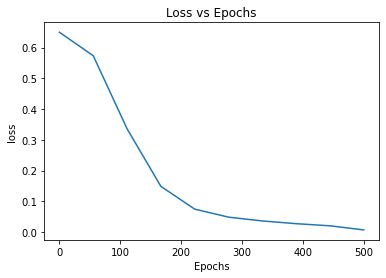

In [30]:
#plotting the loss
losses = [loss.detach().numpy() for loss in losses]
plt.plot(np.linspace(0, 500, num=10), losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

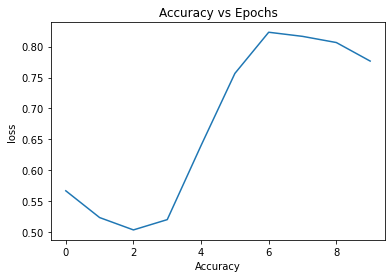

In [31]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')